In [10]:
from pathlib import Path

from plismbench.utils.metrics import format_results, show_aggregate_results
from plismbench.utils.viz import display_plism_metrics

`metrics_root_dir` should have this architecture (as produced by `plismbench evaluate`).
By default, metrics are only computed for 8139 tiles. As as example, you might have different folders corresponding to different extractors (here `h0_mini` and `conch`).

```bash
.
├── 2713_tiles
│   ├── conch
│   │   ├── metrics.csv
│   │   ├── pickles
│   │   └── results.csv
│   ├── h0_mini
│   │   ├── metrics.csv
│   │   ├── pickles
│   │   └── results.csv
...
├── 5426_tiles
│   ├── conch
│   │   ├── metrics.csv
│   │   ├── pickles
│   │   └── results.csv
│   ├── h0_mini
│   │   ├── metrics.csv
│   │   ├── pickles
│   │   └── results.csv
...
└── 8139_tiles
    ├── conch
    │   ├── metrics.csv
    │   ├── pickles
    │   └── results.csv
    ├── h0_mini
    │   ├── metrics.csv
    │   ├── pickles
    └── └── results.csv
```

In [6]:
# Set metrics root directory
metrics_root_dir = Path("/home/owkin/project/plism_metrics/")

# Retrieve a more detailed version of the results
raw_results = format_results(
    metrics_root_dir,
    agg_type="median",  # choose between "median" or "mean"
    n_tiles=8139,  # default number of tiles
)

raw_results.head(8)

,extractor,robustness_type,cosine_similarity,top_1_accuracy,top_3_accuracy,top_5_accuracy,top_10_accuracy,cosine_similarity_median,cosine_similarity_iqr,top_1_accuracy_median,top_1_accuracy_iqr,top_3_accuracy_median,top_3_accuracy_iqr,top_5_accuracy_median,top_5_accuracy_iqr,top_10_accuracy_median,top_10_accuracy_iqr
0,phikon_v2,inter-scanner,0.720 (0.089),0.007 (0.017),0.022 (0.042),0.035 (0.061),0.064 (0.096),0.720,0.089,0.007,0.017,0.022,0.042,0.035,0.061,0.064,0.096
1,phikon_v2,inter-staining,0.658 (0.175),0.002 (0.009),0.009 (0.028),0.015 (0.043),0.030 (0.074),0.658,0.175,0.002,0.009,0.009,0.028,0.015,0.043,0.030,0.074
2,phikon_v2,"inter-scanner, inter-staining",0.538 (0.144),0.000 (0.000),0.001 (0.002),0.001 (0.003),0.003 (0.008),0.538,0.144,0.000,0.000,0.001,0.002,0.001,0.003,0.003,0.008
3,phikon_v2,all,0.557 (0.166),0.000 (0.001),0.001 (0.004),0.002 (0.007),0.005 (0.015),0.557,0.166,0.000,0.001,0.001,0.004,0.002,0.007,0.005,0.015
4,virchow2,inter-scanner,0.882 (0.063),0.310 (0.364),0.458 (0.372),0.523 (0.359),0.609 (0.314),0.882,0.063,0.310,0.364,0.458,0.372,0.523,0.359,0.609,0.314
5,virchow2,inter-staining,0.813 (0.088),0.075 (0.109),0.161 (0.180),0.215 (0.212),0.306 (0.249),0.813,0.088,0.075,0.109,0.161,0.180,0.215,0.212,0.306,0.249
6,virchow2,"inter-scanner, inter-staining",0.766 (0.095),0.022 (0.045),0.064 (0.101),0.098 (0.133),0.163 (0.178),0.766,0.095,0.022,0.045,0.064,0.101,0.098,0.133,0.163,0.178
7,virchow2,all,0.777 (0.103),0.029 (0.067),0.078 (0.135),0.116 (0.173),0.186 (0.219),0.777,0.103,0.029,0.067,0.078,0.135,0.116,0.173,0.186,0.219


In [9]:
# Aggregate and rank results for a specific metric, aggregation over pairs and robustness type
results = show_aggregate_results(
    metrics_root_dir,
    metric_name="cosine_similarity",  # choose between "cosine_similarity", "top_1_accuracy", "top_3_accuracy", "top_5_accuracy", "top_10_accuracy"
    agg_type="median",  # choose between "median" or "mean"
    robustness_type="all",  # choose between "all", "inter-scanner", "inter-staining", "inter-scanner, inter-staining"
    n_tiles=8139,  # default number of tiles
)

results.head(15)

robustness_type,extractor,all,inter-scanner,"inter-scanner, inter-staining",inter-staining
extractor,,,,,
plip,plip,0.878,0.921,0.870,0.908
conch,conch,0.846,0.931,0.840,0.861
h0_mini,h0_mini,0.800,0.922,0.789,0.827
virchow2,virchow2,0.777,0.882,0.766,0.813
kaiko_vit_base_8,kaiko_vit_base_8,0.764,0.866,0.751,0.808
hoptimus0,hoptimus0,0.685,0.845,0.670,0.731
phikon,phikon,0.622,0.810,0.599,0.690
uni2h,uni2h,0.591,0.760,0.562,0.682
provgigapath,provgigapath,0.570,0.791,0.555,0.614


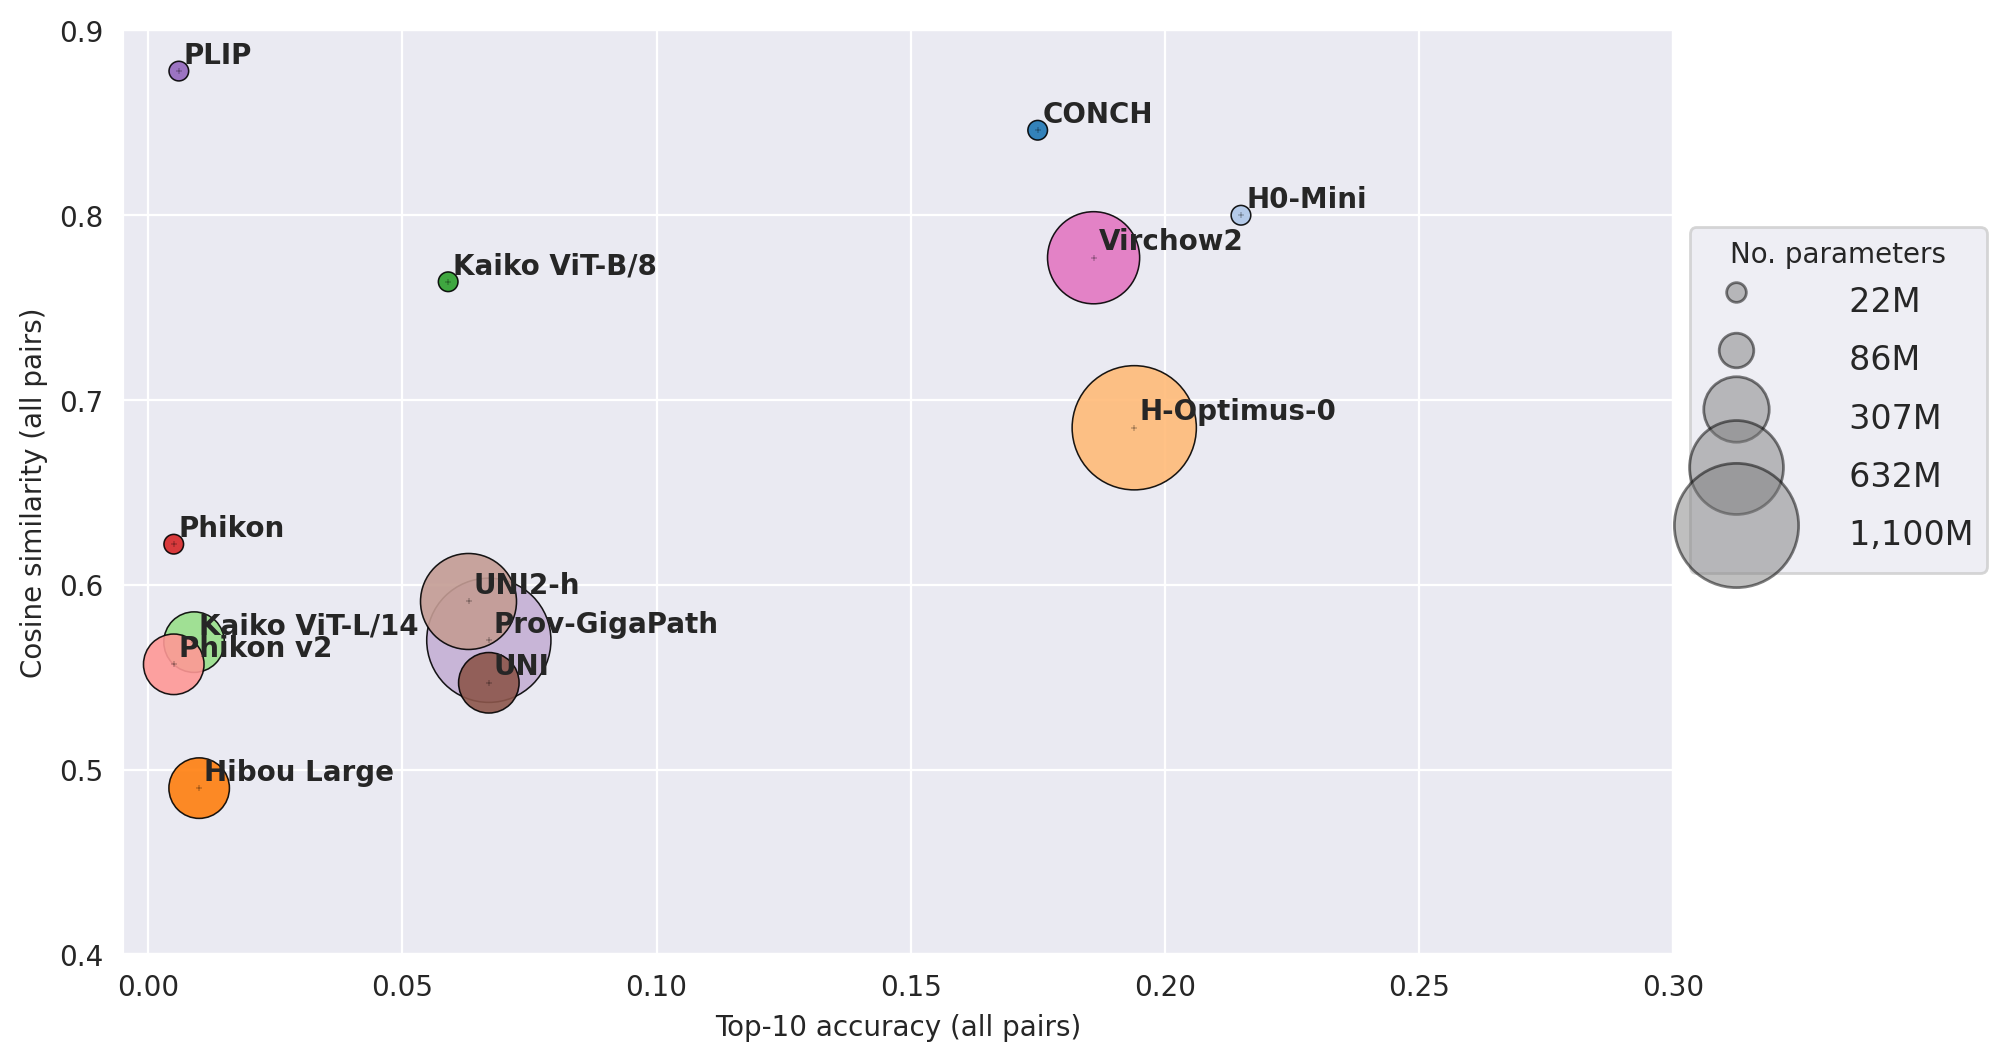

In [12]:
# Visualize the results
display_plism_metrics(
    raw_results,
    xlim=(-0.005, 0.3),
    ylim=(0.4, 0.9),
    metric_x="top_10_accuracy_median",  # should be in ``raw_results``
    metric_y="cosine_similarity_median",  # should be in ``raw_results``
    robustness_x="all",  # should be in ``raw_results``
    robustness_y="all",  # should be in ``raw_results``
    label_x="Top-10 accuracy (all pairs)",
    label_y="Cosine similarity (all pairs)",
    fig_save_path=None,  # can be a str or Path
)